In [1]:
#Installing required packages

#!pip install WordNet
#!pip install torch
#!pip install spacy
#!pip install -U spacy 
#pip install transformers
#!python -m spacy download en_core_web_sm

#importing required libraries

import pandas as pd
import numpy as np 
import nltk
import re
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns


#  Preprocesssing textual data

from nltk import word_tokenize, pos_tag
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', 1000)

# additional nltk resources

nltk.download('stopwords')
nltk.download('lemmatizer')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

# Feature Extraction

from sklearn.feature_extraction.text import TfidfVectorizer


# Check Performance
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading lemmatizer: Package 'lemmatizer' not found
[nltk_data]     in index
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\U

In [2]:
# Importing required data AND Overview
data = pd.read_csv(r"C:\Users\sukan\ipba\csv\comments_for_video_5Eqt_vLPsFw.csv")
data.head(25)

,Comment Number,Reply Number,Like Count,Published At,Text
0,1.0,NaN,0,2023-02-21T16:26:27Z,Thank you for making this and calling them out.
1,2.0,NaN,0,2023-02-18T01:07:25Z,"Hi Blaire, I'm surprised when you said you're not spiritual and that you don't believe in God because you're a very enlightened soul, who is aligned with the truth and that's rare in this world. Keep up the good work and thank you for supporting JK Rowling 💖"
2,3.0,NaN,0,2023-02-17T22:44:42Z,"Blaire, you rock! Thank you for talking about this issue and for calling out celebrities and the left for being silent about it. How on Earth, fighting pedophilia is a partisan issue?! It must be everybody's goal!"
3,4.0,NaN,0,2023-02-17T04:08:11Z,Kids are the one thing we should all agree with don't fuck with kids period
4,5.0,NaN,0,2023-02-16T19:05:02Z,I always say the most wretched of them all are very similar to the most priviledged of them all when it comes to their greed and lack of morals.
5,6.0,NaN,0,2023-02-15T23:57:56Z,"I’ve been doing a lot of research and it’s staggering what’s in the shoadows of the powerful and corrupt. But things are starting to make more since. Especially when you tie in the bombshell of the epstine story and how deep that goes. I’m finding many links to the occult and the demonic. Specificity the worship of baal represented as the bull or moloch represented as the owl which is the god of child sacrifice. Once you open your eyes your realize that evil is in control and what happened here is they said the quiet part out loud. You will find that this is what they do, they say the quite part out loud."
6,7.0,NaN,0,2023-02-15T06:56:34Z,Dont u think the same people are just going to create other brands and do the same thing?
7,8.0,NaN,0,2023-02-15T02:06:40Z,"I'm pretty sure no one normal Left or Right, Lib or Seditionist, name it how you want, is for pedophilia... ...heck woman! Last thing is Portugal Clergy in this theme!"
8,9.0,NaN,0,2023-02-14T19:40:56Z,thank you for your content blaire!
9,10.0,NaN,0,2023-02-14T18:12:01Z,Give your clothes to charity instead of throwing it in the fire 🔥


In [3]:
data.shape

(4565, 5)

In [4]:
# Changing name of 'text' column to 'Comments' column
data.rename(columns = {'Text':'Comments'}, inplace = True)
# removing columns

data = data.drop(['Like Count','Reply Number','Comment Number','Published At'], axis=1)
data = data[['Comments']][:4000]

In [5]:
data['Comments'] =data['Comments'].astype(str)

In [6]:
data.head()

,Comments
0,Thank you for making this and calling them out.
1,"Hi Blaire, I'm surprised when you said you're not spiritual and that you don't believe in God because you're a very enlightened soul, who is aligned with the truth and that's rare in this world. Keep up the good work and thank you for supporting JK Rowling 💖"
2,"Blaire, you rock! Thank you for talking about this issue and for calling out celebrities and the left for being silent about it. How on Earth, fighting pedophilia is a partisan issue?! It must be everybody's goal!"
3,Kids are the one thing we should all agree with don't fuck with kids period
4,I always say the most wretched of them all are very similar to the most priviledged of them all when it comes to their greed and lack of morals.


In [7]:
data.dtypes

Comments    object
dtype: object

In [8]:
data.shape

(4000, 1)

In [9]:
#### EDA- cleaning

In [10]:
# URLs removal and extra spaces too

data['Comments'] = data['Comments'].apply(lambda x: re.sub(r'https?\S+ðŸ˜žðŸ˜­ðŸ¤¬', '', x).strip())

In [11]:
##Remove punctuation

import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [12]:
# Commit to Table
data['Comments'] = data['Comments'].apply(remove_punctuations)

In [13]:
# Convert to lower 
data['Comments']=data['Comments'].apply(lambda x: x.lower())

In [14]:
# Get Stopwords
stop = stopwords.words('english')

In [15]:
# Tokenize and Remove Stop Words
data['Comments'].apply(lambda x: [word for word in x.split() if word not in stop])

0                                                                                                                                                                                   [thank, making, calling]
1                 [hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling, 💖]
2                                                            [blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]
3                                                                                                                                                        [kids, one, thing, agree, dont, fuck, kids, period]
4                                                                                                                                  [always, say, wretched, similar, priviledged, com

In [16]:
# Join the words back
data['Comments'] = data['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [17]:
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

In [18]:
# Commit to Table

data['Comments'] = data['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

In [19]:
# Instantiate the TweetTokenizer
tokenizer = TweetTokenizer()

# Define a function to tokenize a tweet
def tokenize_tweet(tweet):
    # Use the TweetTokenizer to tokenize the tweet
    tokens = tokenizer.tokenize(tweet)
    return tokens

# Apply the tokenization function to the 'Comments' column
data['Tokens'] = data['Comments'].apply(tokenize_tweet)

In [20]:
def pos_tagging(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Perform POS tagging
    tagged_tokens = nltk.pos_tag(tokens)
    # Return the tagged tokens
    return tagged_tokens

In [21]:
# Applying the POS tagging function to the 'Comments' column
data['POS_Tagged'] = data['Comments'].apply(pos_tagging)

In [22]:
data.head()

,Comments,Tokens,POS_Tagged
0,thank making calling,"[thank, making, calling]","[(thank, NN), (making, VBG), (calling, VBG)]"
1,hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling 💖,"[hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling, 💖]","[(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare, VBP), (world, NN), (keep, VB), (good, JJ), (work, NN), (thank, NN), (supporting, VBG), (jk, NN), (rowling, VBG), (💖, NN)]"
2,blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal,"[blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]","[(blaire, NN), (rock, NN), (thank, NN), (talking, VBG), (issue, NN), (calling, VBG), (celebrities, NNS), (left, VBD), (silent, JJ), (earth, NN), (fighting, VBG), (pedophilia, JJ), (partisan, JJ), (issue, NN), (must, MD), (everybodys, VB), (goal, NN)]"
3,kids one thing agree dont fuck kids period,"[kids, one, thing, agree, dont, fuck, kids, period]","[(kids, NNS), (one, CD), (thing, NN), (agree, JJ), (dont, JJ), (fuck, JJ), (kids, NNS), (period, NN)]"
4,always say wretched similar priviledged comes greed lack morals,"[always, say, wretched, similar, priviledged, comes, greed, lack, morals]","[(always, RB), (say, VB), (wretched, VBD), (similar, JJ), (priviledged, VBN), (comes, VBZ), (greed, JJ), (lack, NN), (morals, NNS)]"


In [23]:
####Creating models and using it on the dataset

In [24]:
###Analysing sentiments through vader

In [25]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Generate sentiment scores
sentiment_scores = data['Comments'].apply(sid.polarity_scores)

In [26]:
data["vader_score"] = sentiment_scores.apply(lambda x: x['compound'])

In [27]:
data.head()

,Comments,Tokens,POS_Tagged,vader_score
0,thank making calling,"[thank, making, calling]","[(thank, NN), (making, VBG), (calling, VBG)]",0.3612
1,hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling 💖,"[hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling, 💖]","[(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare, VBP), (world, NN), (keep, VB), (good, JJ), (work, NN), (thank, NN), (supporting, VBG), (jk, NN), (rowling, VBG), (💖, NN)]",0.9298
2,blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal,"[blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]","[(blaire, NN), (rock, NN), (thank, NN), (talking, VBG), (issue, NN), (calling, VBG), (celebrities, NNS), (left, VBD), (silent, JJ), (earth, NN), (fighting, VBG), (pedophilia, JJ), (partisan, JJ), (issue, NN), (must, MD), (everybodys, VB), (goal, NN)]",0.0000
3,kids one thing agree dont fuck kids period,"[kids, one, thing, agree, dont, fuck, kids, period]","[(kids, NNS), (one, CD), (thing, NN), (agree, JJ), (dont, JJ), (fuck, JJ), (kids, NNS), (period, NN)]",0.6542
4,always say wretched similar priviledged comes greed lack morals,"[always, say, wretched, similar, priviledged, comes, greed, lack, morals]","[(always, RB), (say, VB), (wretched, VBD), (similar, JJ), (priviledged, VBN), (comes, VBZ), (greed, JJ), (lack, NN), (morals, NNS)]",-0.6124


In [28]:
count_total=0
count_pos=0
count_neg=0
#count_neut=0


for i in data["vader_score"]:
    if i >=0:
        count_pos=count_pos+1
    elif i <0:
        count_neg = count_neg +1
    else:
        0
        #count_neut = count_neut +1
        
 

print("positive tweets:",count_pos)
print("negative tweets:",count_neg)

conditions = [
    (data['vader_score'] >=0),
    (data['vader_score'] <0)]
    
choices = [1,0]
data['vader_sentiment'] = np.select(conditions, choices )

positive tweets: 2477
negative tweets: 1523


In [29]:
data.head()

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment
0,thank making calling,"[thank, making, calling]","[(thank, NN), (making, VBG), (calling, VBG)]",0.3612,1
1,hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling 💖,"[hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling, 💖]","[(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare, VBP), (world, NN), (keep, VB), (good, JJ), (work, NN), (thank, NN), (supporting, VBG), (jk, NN), (rowling, VBG), (💖, NN)]",0.9298,1
2,blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal,"[blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]","[(blaire, NN), (rock, NN), (thank, NN), (talking, VBG), (issue, NN), (calling, VBG), (celebrities, NNS), (left, VBD), (silent, JJ), (earth, NN), (fighting, VBG), (pedophilia, JJ), (partisan, JJ), (issue, NN), (must, MD), (everybodys, VB), (goal, NN)]",0.0000,1
3,kids one thing agree dont fuck kids period,"[kids, one, thing, agree, dont, fuck, kids, period]","[(kids, NNS), (one, CD), (thing, NN), (agree, JJ), (dont, JJ), (fuck, JJ), (kids, NNS), (period, NN)]",0.6542,1
4,always say wretched similar priviledged comes greed lack morals,"[always, say, wretched, similar, priviledged, comes, greed, lack, morals]","[(always, RB), (say, VB), (wretched, VBD), (similar, JJ), (priviledged, VBN), (comes, VBZ), (greed, JJ), (lack, NN), (morals, NNS)]",-0.6124,0


In [30]:
for i in data['vader_sentiment']:
    if i == 1:
        lable= ("Positive")
    elif i ==0:
        lable= ("Negative")
    else:
        0

        
(data['vader_sentiment'] ==1),
(data['vader_sentiment'] ==0),

choices = ["Positive","Negative"]

data['vader_labels'] = np.select(conditions, choices )

In [31]:
data.head()

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels
0,thank making calling,"[thank, making, calling]","[(thank, NN), (making, VBG), (calling, VBG)]",0.3612,1,Positive
1,hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling 💖,"[hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling, 💖]","[(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare, VBP), (world, NN), (keep, VB), (good, JJ), (work, NN), (thank, NN), (supporting, VBG), (jk, NN), (rowling, VBG), (💖, NN)]",0.9298,1,Positive
2,blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal,"[blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]","[(blaire, NN), (rock, NN), (thank, NN), (talking, VBG), (issue, NN), (calling, VBG), (celebrities, NNS), (left, VBD), (silent, JJ), (earth, NN), (fighting, VBG), (pedophilia, JJ), (partisan, JJ), (issue, NN), (must, MD), (everybodys, VB), (goal, NN)]",0.0000,1,Positive
3,kids one thing agree dont fuck kids period,"[kids, one, thing, agree, dont, fuck, kids, period]","[(kids, NNS), (one, CD), (thing, NN), (agree, JJ), (dont, JJ), (fuck, JJ), (kids, NNS), (period, NN)]",0.6542,1,Positive
4,always say wretched similar priviledged comes greed lack morals,"[always, say, wretched, similar, priviledged, comes, greed, lack, morals]","[(always, RB), (say, VB), (wretched, VBD), (similar, JJ), (priviledged, VBN), (comes, VBZ), (greed, JJ), (lack, NN), (morals, NNS)]",-0.6124,0,Negative


<AxesSubplot:xlabel='vader_labels', ylabel='count'>

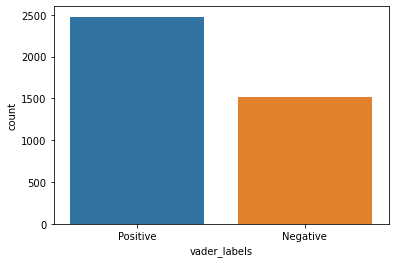

In [32]:
import seaborn as sns

sns.countplot(x='vader_labels', data=data)

Positive Sentiments


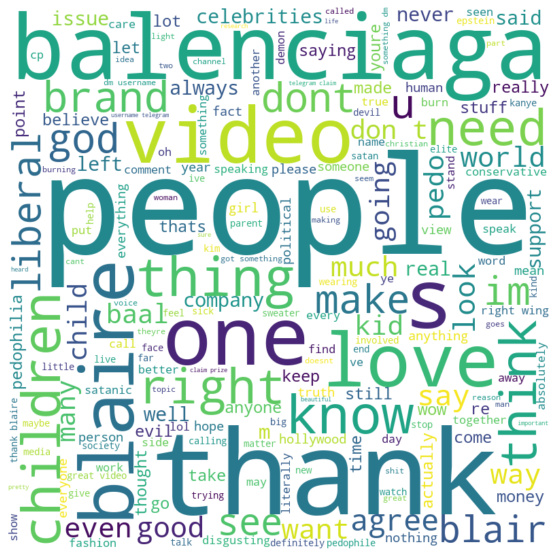

Negative Sentiments


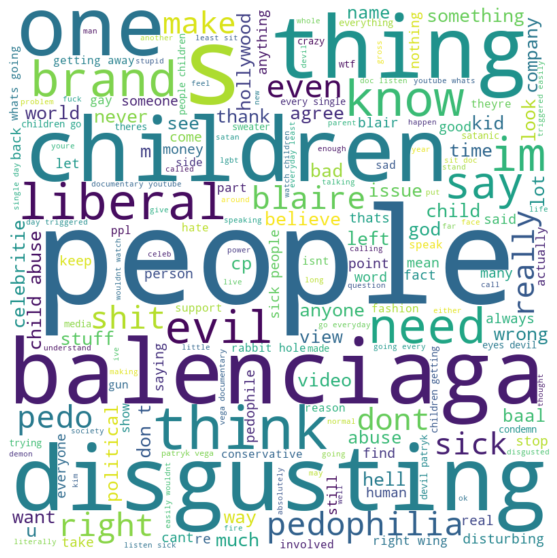

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['vader_labels'] == 'Positive']['Comments'].tolist())

negative_tweets = ' '.join(data[data['vader_labels'] == 'Negative']['Comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)

In [34]:
###Analysing sentiments through pretrained roBERTa

In [35]:
## Importing model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [36]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [37]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
# List of samples
samples = data['Comments'].tolist()

# List to store the scores for each sample
scores_list = []

# Calculate the scores for each sample and store in the scores_list
for sample in samples:
    encoded_text = tokenizer(sample, padding=True, truncation=True, max_length=128, return_tensors='pt')
    input_ids = encoded_text['input_ids']
    attention_mask = encoded_text['attention_mask']
    output = model(input_ids=input_ids, attention_mask=attention_mask)
    scores = torch.softmax(output.logits, dim=1)
    scores_dict = {
        'roberta_neg' : scores[0][0].item(),  
        'roberta_pos' : scores[0][1].item()
    }
    scores_list.append(scores_dict)

# Create a pandas dataframe from the scores_list
scores_df = pd.DataFrame(scores_list)

# Concatenate the original data and scores_df dataframes horizontally
data = pd.concat([data, scores_df], axis=1)

# Print the updated dataframe
print(data)

                                                                                                                                                                          Comments  \
0                                                                                                                                                             thank making calling   
1                  hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling 💖   
2                                                    blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal   
3                                                                                                                                       kids one thing agree dont fuck kids period   
4                                                                                         

In [38]:
data.head(15)

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,roberta_neg,roberta_pos
0,thank making calling,"[thank, making, calling]","[(thank, NN), (making, VBG), (calling, VBG)]",0.3612,1,Positive,0.060613,0.686018
1,hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling 💖,"[hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling, 💖]","[(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare, VBP), (world, NN), (keep, VB), (good, JJ), (work, NN), (thank, NN), (supporting, VBG), (jk, NN), (rowling, VBG), (💖, NN)]",0.9298,1,Positive,0.009808,0.119480
2,blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal,"[blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]","[(blaire, NN), (rock, NN), (thank, NN), (talking, VBG), (issue, NN), (calling, VBG), (celebrities, NNS), (left, VBD), (silent, JJ), (earth, NN), (fighting, VBG), (pedophilia, JJ), (partisan, JJ), (issue, NN), (must, MD), (everybodys, VB), (goal, NN)]",0.0000,1,Positive,0.142670,0.727285
3,kids one thing agree dont fuck kids period,"[kids, one, thing, agree, dont, fuck, kids, period]","[(kids, NNS), (one, CD), (thing, NN), (agree, JJ), (dont, JJ), (fuck, JJ), (kids, NNS), (period, NN)]",0.6542,1,Positive,0.803029,0.182551
4,always say wretched similar priviledged comes greed lack morals,"[always, say, wretched, similar, priviledged, comes, greed, lack, morals]","[(always, RB), (say, VB), (wretched, VBD), (similar, JJ), (priviledged, VBN), (comes, VBZ), (greed, JJ), (lack, NN), (morals, NNS)]",-0.6124,0,Negative,0.894356,0.101082
5,i’ve lot research it’s staggering what’s shoadows powerful corrupt things starting make since especially tie bombshell epstine story deep goes i’m finding many links occult demonic specificity worship baal represented bull moloch represented owl god child sacrifice open eyes realize evil control happened said quiet part loud find say quite part loud,"[i, ’, ve, lot, research, it, ’, s, staggering, what, ’, s, shoadows, powerful, corrupt, things, starting, make, since, especially, tie, bombshell, epstine, story, deep, goes, i, ’, m, finding, many, links, occult, demonic, specificity, worship, baal, represented, bull, moloch, represented, owl, god, child, sacrifice, open, eyes, realize, evil, control, happened, said, quiet, part, loud, find, say, quite, part, loud]","[(i, NN), (’, VBP), (ve, NN), (lot, NN), (research, NN), (it, PRP), (’, VBZ), (s, JJ), (staggering, VBG), (what, WP), (’, NNP), (s, NN), (shoadows, VBZ), (powerful, JJ), (corrupt, JJ), (things, NNS), (starting, VBG), (make, VBP), (since, IN), (especially, RB), (tie, JJ), (bombshell, VBP), (epstine, JJ), (story, NN), (deep, NN), (goes, VBZ), (i, JJ), (’, NNP), (m, VBD), (finding, VBG), (many, JJ), (links, NNS), (occult, VBP), (demonic, JJ), (specificity, NN), (worship, NN), (baal, NN), (represented, VBD), (bull, JJ), (moloch, NN), (represented, VBD), (owl, JJ), (god, JJ), (child, NN), (sacrifice, NN), (open, JJ), (eyes, NNS), (realize, VBP), (evil, JJ), (control, NN), (happened, VBD), (said, VBD), (quiet, JJ), (part, NN), (loud, JJ), (find, VBP), (say, VBP), (quite, JJ), (part, NN), (loud, NN)]",0.1779,1,Positive,0.575687,0.392961
6,dont u think people going create brands thing,"[dont, u, think, people, going, create, brands, thing]","[(dont, JJ), (u, JJ), (think, NN), (people, NNS), (going, VBG), (create, JJ), (brands, NNS), (thing, NN)]",0.2732,1,Positive,0.260766,0.705489
7,im pretty sure one normal left right lib sediti

In [39]:
def get_label(score):
    if score > 0.5:
        return "Positive"
    else:
        return "Negative"

# Convert the scores to labels for each model
data["roberta_labels"] = data["roberta_pos"].apply(get_label)

In [40]:
data.head(5)

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,roberta_neg,roberta_pos,roberta_labels
0,thank making calling,"[thank, making, calling]","[(thank, NN), (making, VBG), (calling, VBG)]",0.3612,1,Positive,0.060613,0.686018,Positive
1,hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling 💖,"[hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling, 💖]","[(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare, VBP), (world, NN), (keep, VB), (good, JJ), (work, NN), (thank, NN), (supporting, VBG), (jk, NN), (rowling, VBG), (💖, NN)]",0.9298,1,Positive,0.009808,0.119480,Negative
2,blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal,"[blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]","[(blaire, NN), (rock, NN), (thank, NN), (talking, VBG), (issue, NN), (calling, VBG), (celebrities, NNS), (left, VBD), (silent, JJ), (earth, NN), (fighting, VBG), (pedophilia, JJ), (partisan, JJ), (issue, NN), (must, MD), (everybodys, VB), (goal, NN)]",0.0000,1,Positive,0.142670,0.727285,Positive
3,kids one thing agree dont fuck kids period,"[kids, one, thing, agree, dont, fuck, kids, period]","[(kids, NNS), (one, CD), (thing, NN), (agree, JJ), (dont, JJ), (fuck, JJ), (kids, NNS), (period, NN)]",0.6542,1,Positive,0.803029,0.182551,Negative
4,always say wretched similar priviledged comes greed lack morals,"[always, say, wretched, similar, priviledged, comes, greed, lack, morals]","[(always, RB), (say, VB), (wretched, VBD), (similar, JJ), (priviledged, VBN), (comes, VBZ), (greed, JJ), (lack, NN), (morals, NNS)]",-0.6124,0,Negative,0.894356,0.101082,Negative


<AxesSubplot:xlabel='roberta_labels', ylabel='count'>

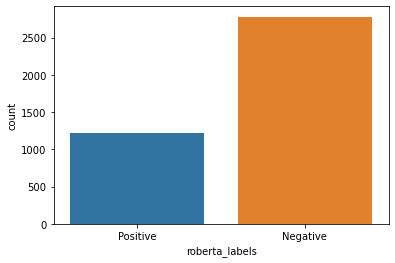

In [41]:
import seaborn as sns

sns.countplot(x='roberta_labels', data=data)

Positive Sentiments


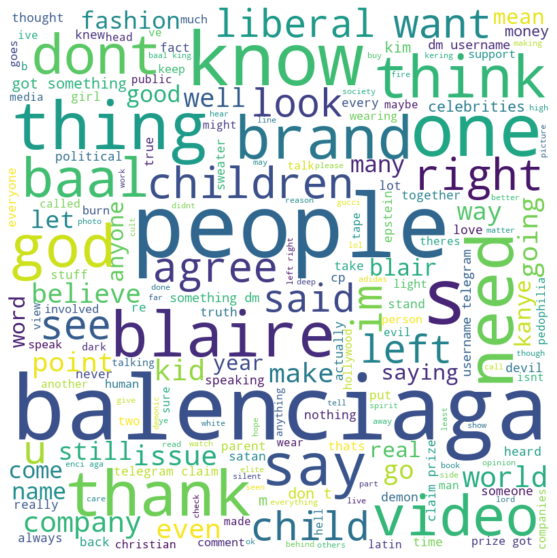

Negative Sentiments


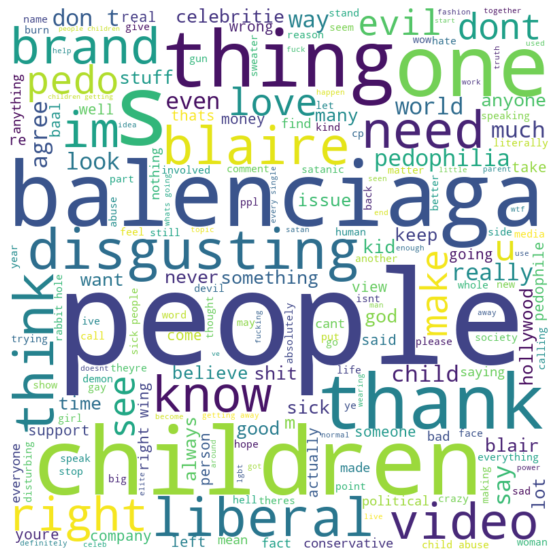

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['roberta_labels'] == 'Positive']['Comments'].tolist())

negative_tweets = ' '.join(data[data['roberta_labels'] == 'Negative']['Comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)

In [43]:
### Analysing sentiments through huggingface transformers

In [44]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [45]:
import spacy
import pandas as pd

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('sentencizer')

#Export sample comments from all the datasets
text = data['Comments'].tolist()[:100]
sentences = []
for doc in nlp.pipe(text):
    sentences.extend([sent.text for sent in doc.sents])

print(sentences)

['thank making calling', 'hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling 💖', 'blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal', 'kids one thing agree dont fuck kids period', 'always say wretched similar priviledged comes greed lack morals', 'i’ve lot research it’s staggering what’s shoadows powerful corrupt things starting make since especially tie bombshell epstine story deep goes i’m finding many links occult demonic specificity worship baal represented bull moloch represented owl god child sacrifice open eyes realize evil control happened said quiet part loud find say quite part loud', 'dont u think people going create brands thing', 'im pretty sure one normal left right lib seditionist name want pedophilia heck woman last thing portugal clergy theme', 'thank content blaire', 'give clothes charity

In [46]:
sent_pipeline(data['Comments'].tolist()[:100])

[{'label': 'POSITIVE', 'score': 0.9998476505279541},
 {'label': 'POSITIVE', 'score': 0.9988492727279663},
 {'label': 'POSITIVE', 'score': 0.982991635799408},
 {'label': 'NEGATIVE', 'score': 0.8874290585517883},
 {'label': 'NEGATIVE', 'score': 0.9992269277572632},
 {'label': 'NEGATIVE', 'score': 0.9421719312667847},
 {'label': 'NEGATIVE', 'score': 0.9833018183708191},
 {'label': 'NEGATIVE', 'score': 0.9950954914093018},
 {'label': 'POSITIVE', 'score': 0.9998338222503662},
 {'label': 'NEGATIVE', 'score': 0.9921882152557373},
 {'label': 'NEGATIVE', 'score': 0.9982255101203918},
 {'label': 'POSITIVE', 'score': 0.7060990333557129},
 {'label': 'NEGATIVE', 'score': 0.9825387001037598},
 {'label': 'POSITIVE', 'score': 0.9998196959495544},
 {'label': 'POSITIVE', 'score': 0.9996826648712158},
 {'label': 'POSITIVE', 'score': 0.9994077682495117},
 {'label': 'POSITIVE', 'score': 0.9608721733093262},
 {'label': 'NEGATIVE', 'score': 0.9960849285125732},
 {'label': 'NEGATIVE', 'score': 0.9802006483078

In [47]:
sentiments = sent_pipeline(data['Comments'].tolist())
data['transformer_score'] = [s['score'] for s in sentiments]
data['transformer_labels'] = [s['label'] for s in sentiments]

In [48]:
data['transformer_labels']=data['transformer_labels'].str.title()

In [49]:
data.head(15)

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,roberta_neg,roberta_pos,roberta_labels,transformer_score,transformer_labels
0,thank making calling,"[thank, making, calling]","[(thank, NN), (making, VBG), (calling, VBG)]",0.3612,1,Positive,0.060613,0.686018,Positive,0.999848,Positive
1,hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling 💖,"[hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling, 💖]","[(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare, VBP), (world, NN), (keep, VB), (good, JJ), (work, NN), (thank, NN), (supporting, VBG), (jk, NN), (rowling, VBG), (💖, NN)]",0.9298,1,Positive,0.009808,0.119480,Negative,0.998849,Positive
2,blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal,"[blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]","[(blaire, NN), (rock, NN), (thank, NN), (talking, VBG), (issue, NN), (calling, VBG), (celebrities, NNS), (left, VBD), (silent, JJ), (earth, NN), (fighting, VBG), (pedophilia, JJ), (partisan, JJ), (issue, NN), (must, MD), (everybodys, VB), (goal, NN)]",0.0000,1,Positive,0.142670,0.727285,Positive,0.982992,Positive
3,kids one thing agree dont fuck kids period,"[kids, one, thing, agree, dont, fuck, kids, period]","[(kids, NNS), (one, CD), (thing, NN), (agree, JJ), (dont, JJ), (fuck, JJ), (kids, NNS), (period, NN)]",0.6542,1,Positive,0.803029,0.182551,Negative,0.887429,Negative
4,always say wretched similar priviledged comes greed lack morals,"[always, say, wretched, similar, priviledged, comes, greed, lack, morals]","[(always, RB), (say, VB), (wretched, VBD), (similar, JJ), (priviledged, VBN), (comes, VBZ), (greed, JJ), (lack, NN), (morals, NNS)]",-0.6124,0,Negative,0.894356,0.101082,Negative,0.999227,Negative
5,i’ve lot research it’s staggering what’s shoadows powerful corrupt things starting make since especially tie bombshell epstine story deep goes i’m finding many links occult demonic specificity worship baal represented bull moloch represented owl god child sacrifice open eyes realize evil control happened said quiet part loud find say quite part loud,"[i, ’, ve, lot, research, it, ’, s, staggering, what, ’, s, shoadows, powerful, corrupt, things, starting, make, since, especially, tie, bombshell, epstine, story, deep, goes, i, ’, m, finding, many, links, occult, demonic, specificity, worship, baal, represented, bull, moloch, represented, owl, god, child, sacrifice, open, eyes, realize, evil, control, happened, said, quiet, part, loud, find, say, quite, part, loud]","[(i, NN), (’, VBP), (ve, NN), (lot, NN), (research, NN), (it, PRP), (’, VBZ), (s, JJ), (staggering, VBG), (what, WP), (’, NNP), (s, NN), (shoadows, VBZ), (powerful, JJ), (corrupt, JJ), (things, NNS), (starting, VBG), (make, VBP), (since, IN), (especially, RB), (tie, JJ), (bombshell, VBP), (epstine, JJ), (story, NN), (deep, NN), (goes, VBZ), (i, JJ), (’, NNP), (m, VBD), (finding, VBG), (many, JJ), (links, NNS), (occult, VBP), (demonic, JJ), (specificity, NN), (worship, NN), (baal, NN), (represented, VBD), (bull, JJ), (moloch, NN), (represented, VBD), (owl, JJ), (god, JJ), (child, NN), (sacrifice, NN), (open, JJ), (eyes, NNS), (realize, VBP), (evil, JJ), (control, NN), (happened, VBD), (said, VBD), (quiet, JJ), (part, NN), (loud, JJ), (find, VBP), (say, VBP), (quite, JJ), (part, NN), (loud, NN)]",0.1779,1,Positive,0.575687,0.392961,Negative,0.942172,Negative
6,dont u think people going create brands thing,"[dont, u, think, people, going, cre

<AxesSubplot:xlabel='transformer_labels', ylabel='count'>

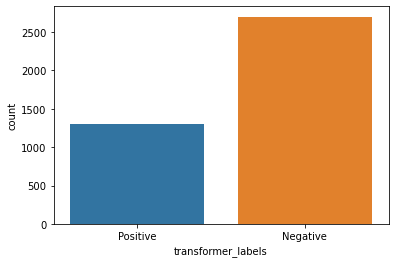

In [50]:
import seaborn as sns

sns.countplot(x='transformer_labels', data=data)

Positive Sentiments


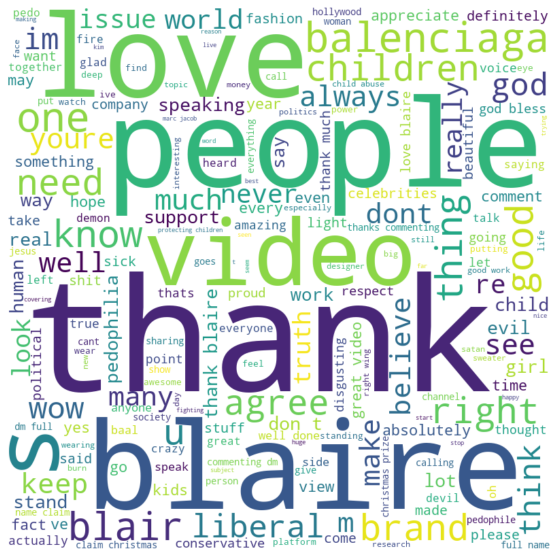

Negative Sentiments


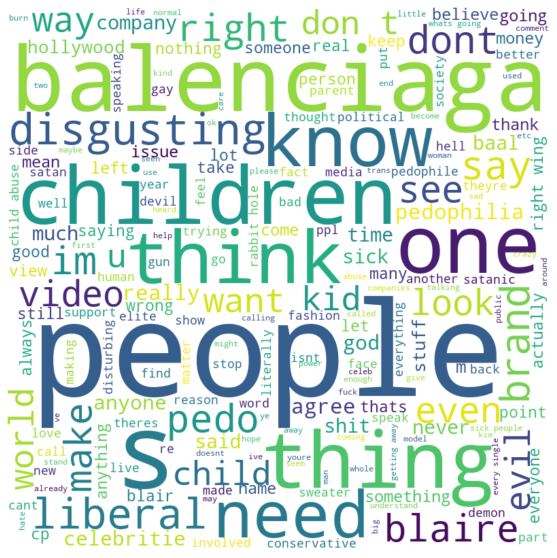

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['transformer_labels'] == 'Positive']['Comments'].tolist())

negative_tweets = ' '.join(data[data['transformer_labels'] == 'Negative']['Comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)

In [52]:
##### creating data frame of labels of the models used.

In [53]:
labels = data[['Comments','vader_labels','roberta_labels','transformer_labels']]

In [54]:
labels.head(10)

,Comments,vader_labels,roberta_labels,transformer_labels
0,thank making calling,Positive,Positive,Positive
1,hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling 💖,Positive,Negative,Positive
2,blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal,Positive,Positive,Positive
3,kids one thing agree dont fuck kids period,Positive,Negative,Negative
4,always say wretched similar priviledged comes greed lack morals,Negative,Negative,Negative
5,i’ve lot research it’s staggering what’s shoadows powerful corrupt things starting make since especially tie bombshell epstine story deep goes i’m finding many links occult demonic specificity worship baal represented bull moloch represented owl god child sacrifice open eyes realize evil control happened said quiet part loud find say quite part loud,Positive,Negative,Negative
6,dont u think people going create brands thing,Positive,Positive,Negative
7,im pretty sure one normal left right lib seditionist name want pedophilia heck woman last thing portugal clergy theme,Positive,Negative,Negative
8,thank content blaire,Positive,Negative,Positive
9,give clothes charity instead throwing fire 🔥,Positive,Positive,Negative


In [55]:
####Checking accuracy and F1 Score of the models used.

In [63]:
from sklearn.metrics import accuracy_score, f1_score


# Get the Vader labels
y_true = data['transformer_labels']
# Get the labels from approach 1
y_pred_approach_1 = data['vader_labels']
y_pred_approach_2 = data['roberta_labels']
# Calculate the accuracy score for each approach
acc_approach_1 = accuracy_score(y_true, y_pred_approach_1)
acc_approach_2 = accuracy_score(y_true, y_pred_approach_2)
# Calculate the F1 score for each approach
f1_approach_1 = f1_score(y_true, y_pred_approach_1, average='weighted')
f1_approach_2 = f1_score(y_true, y_pred_approach_2, average='weighted')
# Print the results
 
print("Accuracy for vader_labels : {:.4f}".format(acc_approach_1))
print("F1 score for vader_labels: {:.4f}".format(f1_approach_1))
print("Accuracy for roberta_labels : {:.4f}".format(acc_approach_2))
print("F1 score for roberta_labels: {:.4f}".format(f1_approach_2))

Accuracy for vader_labels : 0.6370
F1 score for vader_labels: 0.6429
Accuracy for roberta_labels : 0.6065
F1 score for roberta_labels: 0.6030


In [64]:
####comparison of the results of the scores of models through plots

In [65]:
import matplotlib.pyplot as plt
vader_f1 = [f1_approach_1,]
roberta_f1 = [f1_approach_2]
vader_acc = [acc_approach_1]
roberta_acc = [acc_approach_2]

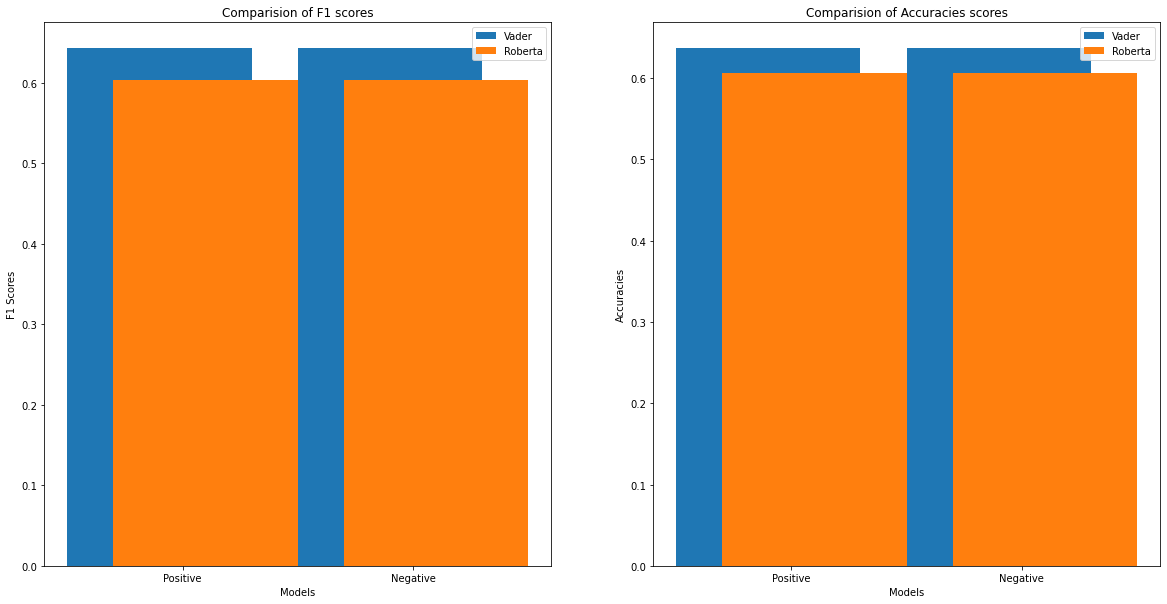

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].bar([0, 1], vader_f1, label='Vader')
axs[0].bar([0.2, 1.2], roberta_f1, label='Roberta')
axs[0].set_xlabel('Models')
axs[0].set_ylabel('F1 Scores')
axs[0].set_xticks([0.1, 1.1])
axs[0].set_xticklabels(['Positive', 'Negative'])
axs[0].set_title('Comparision of F1 scores')
axs[0].legend()
# Plot accuracies in the second subplot
axs[1].bar([0, 1], vader_acc, label='Vader')
axs[1].bar([0.2, 1.2], roberta_acc, label='Roberta')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('Accuracies')
axs[1].set_xticks([0.1, 1.1])
axs[1].set_xticklabels(['Positive', 'Negative'])
axs[1].set_title('Comparision of Accuracies scores')
axs[1].legend()

In [60]:
###Conclusion
###Based on the F1 scores, the Vader model has the highest F1 score of   0.6429 ,outperforming Roberta model's f1 score of  0.6030, so to conclude , Vader model predicted sentiments much accurately than roberta model for a dataset of this type and size.


